In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Arial'

## Load the data

In [2]:
df_results = pd.read_excel('metrics.xlsx')
df_results = df_results.set_index('Unnamed: 0')
df_results.head(13)

,AUC,c@1,F1,F0.5u,Overall
Unnamed: 0,,,,,
boenninghoff20-large,0.969237,0.928269,0.936349,0.906665,0.935130
weerasinghe20-large,0.953372,0.879743,0.891481,0.881905,0.901625
boenninghoff20-small,0.939986,0.889061,0.905762,0.853452,0.897065
weerasinghe20-small,0.938713,0.832856,0.859970,0.816656,0.862049
halvani20-small,0.877568,0.796195,0.806912,0.818917,0.824898
kipnis20-small,0.865970,0.800979,0.808628,0.814546,0.822531
araujo20-small,0.873920,0.770037,0.811372,0.762223,0.804388
niven20-small,0.794689,0.785619,0.778324,0.841510,0.800036
gagala20-small,0.786438,0.786458,0.800340,0.808773,0.795502


In [3]:
df_pred = pd.read_excel('predictions_topic.xlsx')
df_pred = df_pred.loc[:, ~df_pred.columns.str.match('Unnamed')]
df_pred.head()

,id,same,araujo20-large,araujo20-small,boenninghoff20-large,boenninghoff20-small,faber20-small,gagala20-small,halvani20-small,ikae20-small,kipnis20-small,niven20-small,ordonez20-large,weerasinghe20-large,weerasinghe20-small,topic-diff
0,c04fdf1e-ddf5-5542-96e7-13ce18cae176,1,0.959482,0.999483,0.998031,9.935224e-01,0.2333,1,0.610,0.778370,0.952,0.743432,0.995946,1.000000,1.000000,0.542654
1,49dc4cae-3d32-5b4d-b240-a080a1dbb659,0,0.207092,0.751470,0.164877,5.000000e-01,0.2833,0,0.473,0.689979,0.194,0.256587,0.988152,0.004039,0.566177,0.587474
2,f326fe7c-fc10-566f-a70f-0f36e3f92399,0,0.208751,0.819039,0.000001,1.582263e-08,0.4333,0,0.443,0.688720,0.382,0.256587,1.000000,0.003807,0.003335,0.581967
3,16daa0d1-61b8-5650-b7ee-5e265bd40910,1,0.995293,0.979941,0.716923,3.127071e-02,0.2167,1,0.526,0.728918,0.680,0.743432,1.000000,1.000000,0.995425,0.758196
4,08b536a8-4fed-5f62-97bb-e57f79e841d2,0,0.970113,0.679099,0.500000,8.246948e-01,0.4667,0,0.413,0.649772,0.164,0.256587,0.999990,0.081437,0.000050,0.644368


In [4]:
df_pred['same'].value_counts()

1    7786
0    6525
Name: same, dtype: int64

## General distributions of predictions

In [5]:
participants = [c for c in df_pred.columns if c.endswith('-small')]
participants

['araujo20-small',
 'boenninghoff20-small',
 'faber20-small',
 'gagala20-small',
 'halvani20-small',
 'ikae20-small',
 'kipnis20-small',
 'niven20-small',
 'weerasinghe20-small']

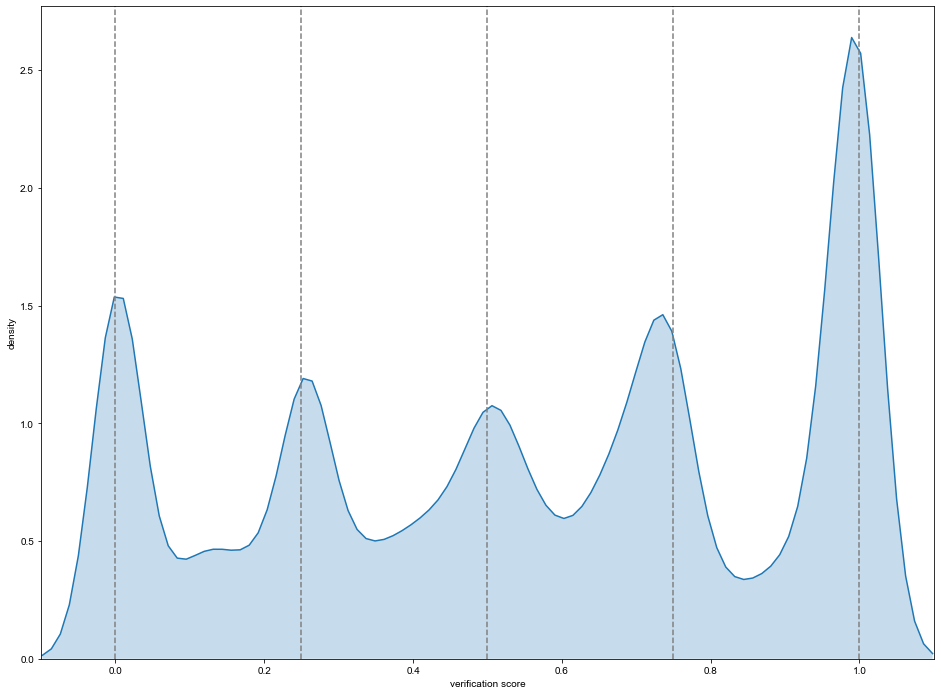

In [6]:
import seaborn as sb
figure, ax = plt.subplots(figsize=(16, 12))
sb.kdeplot(df_pred[participants].values.flatten(), shade=True);
plt.axvline(0, ls='--', c='grey')
plt.axvline(0.5, ls='--', c='grey')
plt.axvline(1, ls='--', c='grey')
plt.axvline(0.25, ls='--', c='grey')
plt.axvline(0.75, ls='--', c='grey')
plt.xlabel('verification score')
plt.ylabel('density')
plt.xlim(-0.1, 1.1)
plt.savefig('img/allmodes.svg');

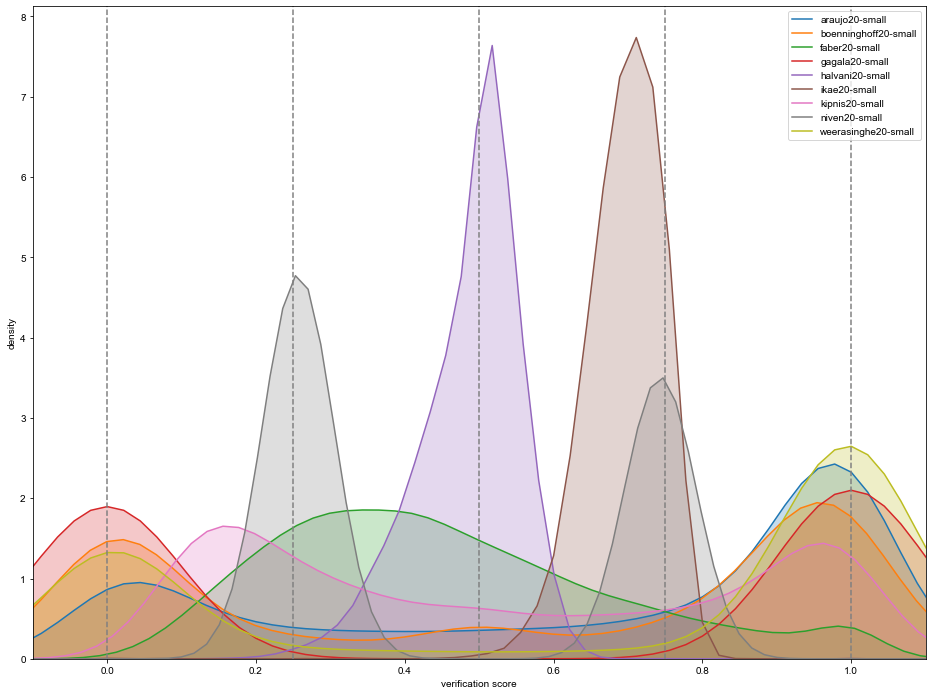

In [7]:
figure, ax = plt.subplots(figsize=(16, 12))
for column in df_pred[participants]:
    sb.kdeplot(df_pred[column], bw=.2, label=column, shade=True, ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1);
plt.axvline(0, ls='--', c='grey')
plt.axvline(0.5, ls='--', c='grey')
plt.axvline(1, ls='--', c='grey')
plt.axvline(0.25, ls='--', c='grey')
plt.axvline(0.75, ls='--', c='grey')
plt.xlabel('verification score')
plt.ylabel('density')
plt.xlim(-0.1, 1.1)
plt.savefig('img/teammodes.svg');

## Non-answers

In [8]:
non_answers = []
for column in participants:
    non_answers.append(np.sum(df_pred[column] == 0.5))
non_answers

[0, 1082, 360, 0, 108, 0, 839, 0, 0]

In [9]:
c_at_1 = [df_results.loc[p]['c@1'] for p in participants]

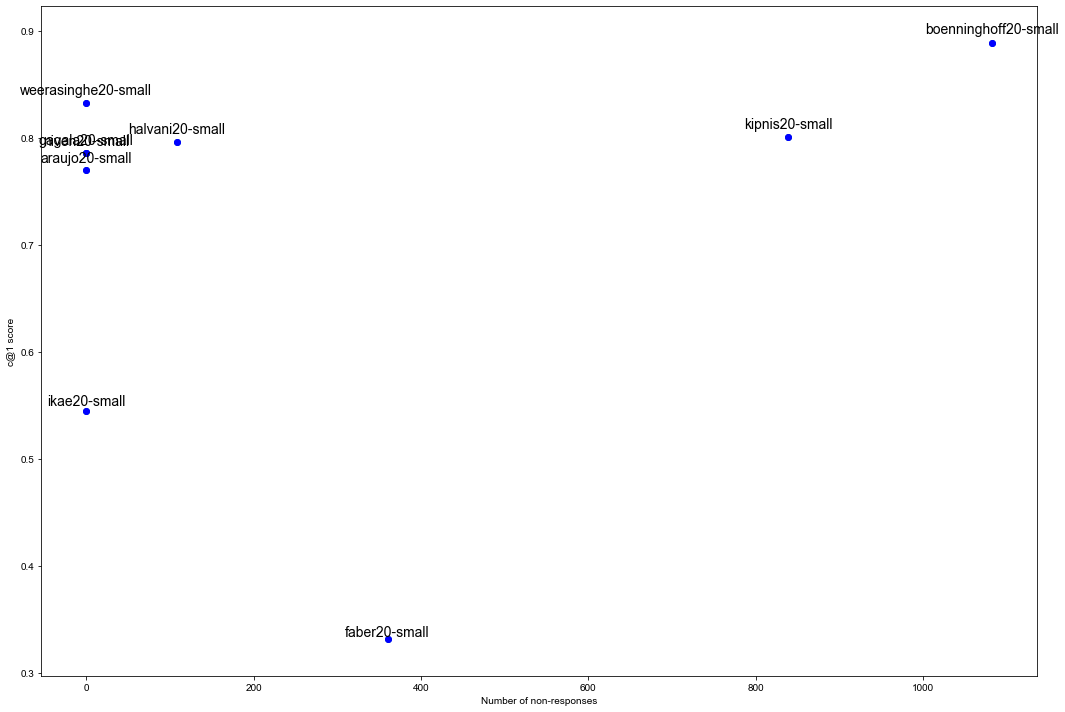

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(non_answers, c_at_1)
for lab, y, x in zip(participants, c_at_1, non_answers):
    plt.plot(x, y, 'bo')
    plt.text(x, y * (1 + 0.01), lab, ha='center', fontsize=14)
plt.xlabel('Number of non-responses')
plt.ylabel('c@1 score')
plt.tight_layout()
plt.savefig('img/c_at_1.svg');

This shows that Boenninghoff20 and kipnis20 managed to submit a relatively high number of non-answers, but without compromising their final score.

Is Boenninghoff20's position in first place explicitly due to this deliberate strategy?

In [12]:
answered = df_pred['boenninghoff20-large'] != 0.5

from pan20_verif_evaluator import *

evaluations = []
metrics = {'AUC': auc, 'c@1': c_at_1, 'F1': f1, 'F0.5u': f_05_u_score}
systems = ['boenninghoff20-large', 'weerasinghe20-large']
for system in systems:
    gold = df_pred[answered]['same'].astype(np.int64).values
    silver = df_pred[answered][system].values
    evaluations.append([metrics[m](gold, silver) for m in metrics])

evaluations = pd.DataFrame(evaluations, columns=list(metrics.keys()), index=systems)
evaluations['Overall'] = evaluations.mean(axis=1)
evaluations = evaluations.sort_values('Overall', ascending=False)
evaluations

,AUC,c@1,F1,F0.5u,Overall
boenninghoff20-large,0.974036,0.930176,0.936349,0.934031,0.943648
weerasinghe20-large,0.957700,0.886555,0.897986,0.888582,0.907706


In [13]:
print(evaluations.to_latex(bold_rows=True))

\begin{tabular}{lrrrrr}
\toprule
{} &       AUC &       c@1 &        F1 &     F0.5u &   Overall \\
\midrule
\textbf{boenninghoff20-large} &  0.974036 &  0.930176 &  0.936349 &  0.934031 &  0.943648 \\
\textbf{weerasinghe20-large } &  0.957700 &  0.886555 &  0.897986 &  0.888582 &  0.907706 \\
\bottomrule
\end{tabular}



## Effect of topic similarity

Extract the mean prediction across all (small) participants:

In [14]:
small = df_pred[participants].dropna().copy()
small['mean_pred'] = small.mean(axis=1)
small.head()

,araujo20-small,boenninghoff20-small,faber20-small,gagala20-small,halvani20-small,ikae20-small,kipnis20-small,niven20-small,weerasinghe20-small,mean_pred
0,0.999483,9.935224e-01,0.2333,1,0.610,0.778370,0.952,0.743432,1.000000,0.812234
1,0.751470,5.000000e-01,0.2833,0,0.473,0.689979,0.194,0.256587,0.566177,0.412724
2,0.819039,1.582263e-08,0.4333,0,0.443,0.688720,0.382,0.256587,0.003335,0.336220
3,0.979941,3.127071e-02,0.2167,1,0.526,0.728918,0.680,0.743432,0.995425,0.655743
4,0.679099,8.246948e-01,0.4667,0,0.413,0.649772,0.164,0.256587,0.000050,0.383767


In [15]:
small['topic-sim'] = 1 - df_pred['topic-diff']
small.head()

,araujo20-small,boenninghoff20-small,faber20-small,gagala20-small,halvani20-small,ikae20-small,kipnis20-small,niven20-small,weerasinghe20-small,mean_pred,topic-sim
0,0.999483,9.935224e-01,0.2333,1,0.610,0.778370,0.952,0.743432,1.000000,0.812234,0.457346
1,0.751470,5.000000e-01,0.2833,0,0.473,0.689979,0.194,0.256587,0.566177,0.412724,0.412526
2,0.819039,1.582263e-08,0.4333,0,0.443,0.688720,0.382,0.256587,0.003335,0.336220,0.418033
3,0.979941,3.127071e-02,0.2167,1,0.526,0.728918,0.680,0.743432,0.995425,0.655743,0.241804
4,0.679099,8.246948e-01,0.4667,0,0.413,0.649772,0.164,0.256587,0.000050,0.383767,0.355632


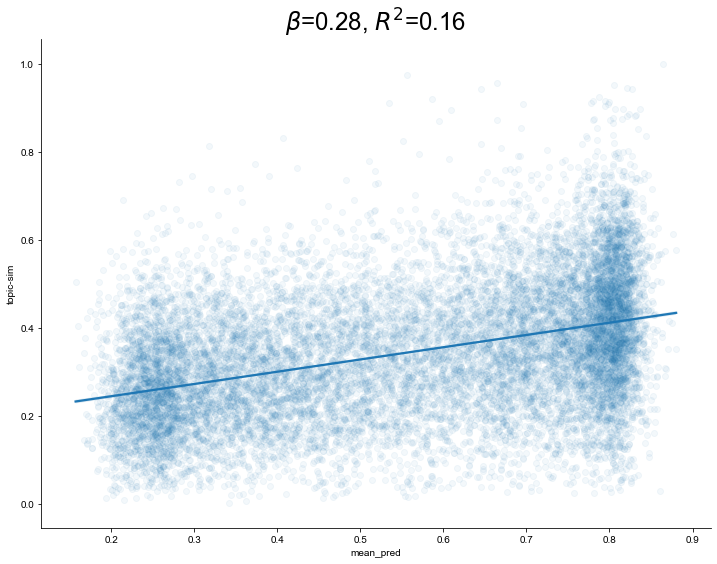

In [16]:
df_xy = small[['mean_pred', 'topic-sim']].copy()
df_xy = df_xy.dropna()
df_xy.head()

fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.regplot(x='mean_pred', y='topic-sim', data=df_xy, scatter_kws={'alpha':0.05})

beta, intercept, r_value, p_value, std_err = stats.linregress(df_xy['mean_pred'], df_xy['topic-sim'])
plt.title(f'$β$={beta:0.2f}, $R^2$={r_value ** 2:0.2f}', fontsize=24)
sns.despine()
plt.savefig('img/all_fit.svg');

Determine where the mean prediction was correct:

In [17]:
small['same'] = df_pred['same'].astype(np.bool)
small['mean_correct'] = (small['mean_pred'] > 0.5) == (small['same'])
small.head(10)

,araujo20-small,boenninghoff20-small,faber20-small,gagala20-small,halvani20-small,ikae20-small,kipnis20-small,niven20-small,weerasinghe20-small,mean_pred,topic-sim,same,mean_correct
0,0.999483,9.935224e-01,0.2333,1,0.610,0.778370,0.952,0.743432,1.000000,0.812234,0.457346,True,True
1,0.751470,5.000000e-01,0.2833,0,0.473,0.689979,0.194,0.256587,0.566177,0.412724,0.412526,False,True
2,0.819039,1.582263e-08,0.4333,0,0.443,0.688720,0.382,0.256587,0.003335,0.336220,0.418033,False,True
3,0.979941,3.127071e-02,0.2167,1,0.526,0.728918,0.680,0.743432,0.995425,0.655743,0.241804,True,True
4,0.679099,8.246948e-01,0.4667,0,0.413,0.649772,0.164,0.256587,0.000050,0.383767,0.355632,False,True
5,0.477536,9.207186e-01,0.1667,1,0.477,0.635421,0.120,0.256587,0.993325,0.560810,0.077602,True,True
6,0.105032,6.863829e-01,0.2833,1,0.495,0.668806,0.160,0.256587,0.999819,0.517214,0.508339,True,True
7,0.980529,9.935460e-01,0.6500,1,0.538,0.765153,0.986,0.743432,0.999998,0.850740,0.460061,True,True
8,0.020657,4.875796e-05,0.8500,0,0.380,0.607548,0.106,0.256587,0.000010,0.246761,0.312050,False,True
9,0.753522,9.480460e-01,0.7167,1,0.514,0.732994,0.725,0.743432,0.999981,0.792631,0.485756,True,True


Accuracy of the mean predictor:

In [18]:
small['mean_correct'].sum() / len(small['mean_correct'])

0.8717070784711062

correct cases: β=0.28, $R^2$=0.17


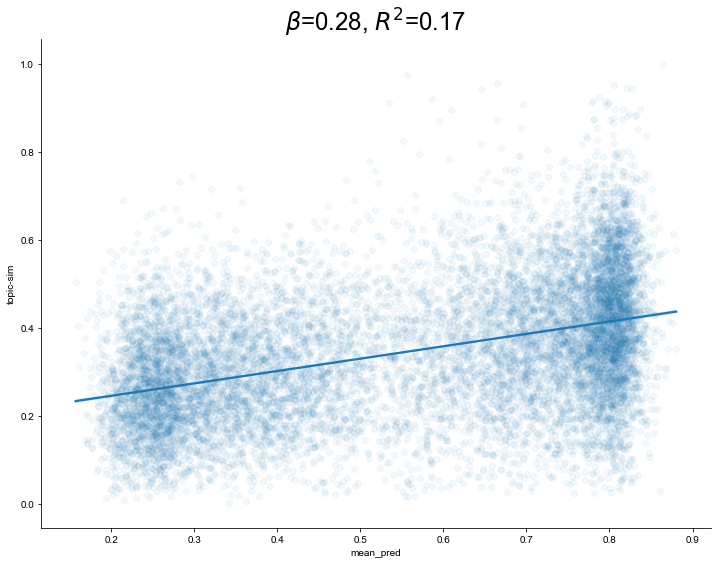

In [19]:
fig, ax = plt.subplots(figsize=(12, 9))
x, y = small[small['mean_correct']]['mean_pred'], small[small['mean_correct']]['topic-sim']
ax = sns.regplot(x, y, scatter_kws={'alpha':0.05}, order=1)
mask = ~np.isnan(x) & ~np.isnan(y)
beta, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
plt.title(f'$β$={beta:0.2f}, $R^2$={r_value ** 2:0.2f}', fontsize=24)
print(f'correct cases: β={beta:0.2f}, $R^2$={r_value ** 2:0.2f}')
sns.despine()

incorrect cases: β=0.19, $R^2$=0.03


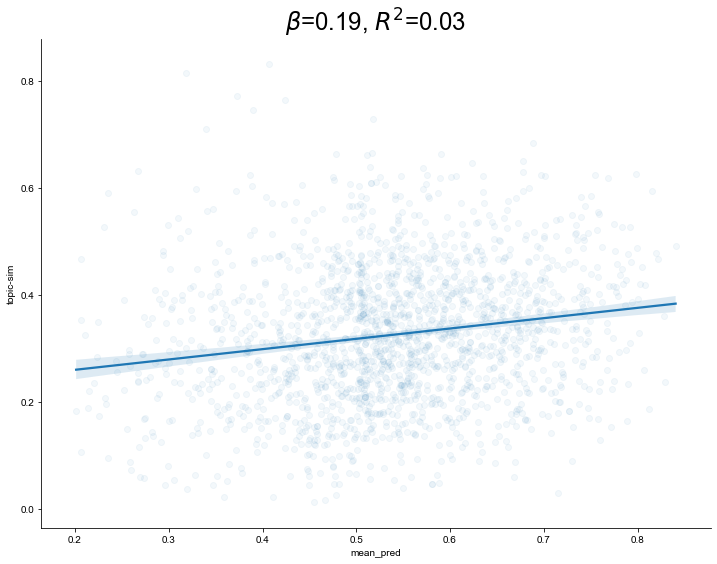

In [20]:
fig, ax = plt.subplots(figsize=(12, 9))
x, y = small[~small['mean_correct']]['mean_pred'], small[~small['mean_correct']]['topic-sim']
ax = sns.regplot(x, y, scatter_kws={'alpha':0.05}, order=1)
mask = ~np.isnan(x) & ~np.isnan(y)
beta, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
plt.title(f'$β$={beta:0.2f}, $R^2$={r_value ** 2:0.2f}', fontsize=24)
sns.despine()
print(f'incorrect cases: β={beta:0.2f}, $R^2$={r_value ** 2:0.2f}')

The explanatory value of this model *decreases* for the wrong answers: that suggests that relying on topic similarity is actual a good idea. This is somewhat counter-intuitive: is topical similarity on average higher for same-author text pairs?

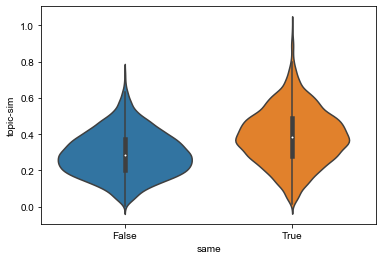

In [21]:
ax = sb.violinplot(x="same", y="topic-sim", data=small)
plt.savefig('img/violin.svg');

In [22]:
from sklearn.metrics import classification_report
print(classification_report(small['same'], [int(c > 0.5) for c in small['mean_pred']]))

              precision    recall  f1-score   support

       False       0.89      0.81      0.85      6525
        True       0.86      0.92      0.89      7786

    accuracy                           0.87     14311
   macro avg       0.88      0.87      0.87     14311
weighted avg       0.87      0.87      0.87     14311



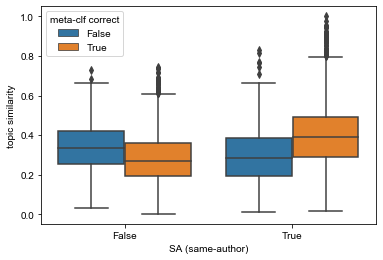

In [23]:
df_ = small.copy() # tmp'ly change labels for plotting
df_.columns = ['araujo20-small', 'boenninghoff20-small', 'faber20-small',
       'gagala20-small', 'halvani20-small', 'ikae20-small', 'kipnis20-small',
       'niven20-small', 'weerasinghe20-small', 'mean_pred', 'topic similarity',
       'SA (same-author)', 'meta-clf correct']
ax = sb.boxplot(x='SA (same-author)', y='topic similarity', hue='meta-clf correct', data=df_)
plt.savefig('img/complex.svg');

### Precision-Recall curves

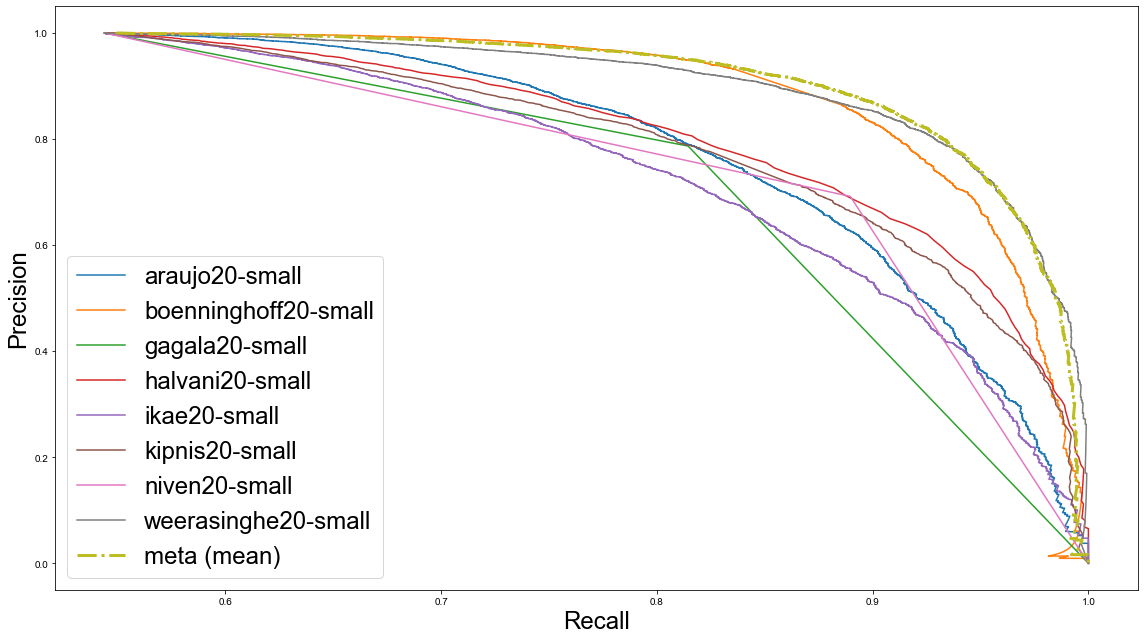

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize=(16, 9))

for team in participants + ['mean_pred']:
    if team.startswith('faber'):
        continue
    else:
        precision, recall, thresholds = precision_recall_curve(small['same'], small[team])
        if team.startswith('mean_'):
            plt.plot(precision, recall, label='meta (mean)', ls='-.', linewidth=3)
        else:
            plt.plot(precision, recall, label=team)
plt.xlabel('Recall', fontsize=24)
plt.ylabel('Precision', fontsize=24)
plt.legend(loc='lower left', fontsize=24)
plt.tight_layout()
plt.savefig('img/pr_curve.svg');